In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Spliting Data for training & testing

In [7]:
X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
t_data = x_train.join(Y_train)
t_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2816,-119.02,35.41,21.0,2534.0,554.0,1297.0,517.0,2.0575,INLAND,67000.0
10848,-117.91,33.66,26.0,5761.0,1326.0,2681.0,1116.0,4.0341,<1H OCEAN,243300.0
13403,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,INLAND,141000.0
15733,-122.44,37.78,52.0,1118.0,279.0,514.0,284.0,2.4196,NEAR BAY,346200.0
14408,-117.25,32.76,38.0,2331.0,493.0,836.0,433.0,4.9125,NEAR OCEAN,452600.0
...,...,...,...,...,...,...,...,...,...,...
11123,-117.92,33.85,44.0,1231.0,258.0,682.0,244.0,3.2344,<1H OCEAN,170100.0
18436,-121.84,37.25,17.0,2363.0,473.0,1369.0,442.0,4.8355,<1H OCEAN,141600.0
3248,-119.82,36.19,33.0,1293.0,272.0,694.0,229.0,2.0221,INLAND,52200.0
14953,-116.97,32.76,26.0,2460.0,313.0,838.0,299.0,5.9878,<1H OCEAN,270700.0


#### Data Exploration

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

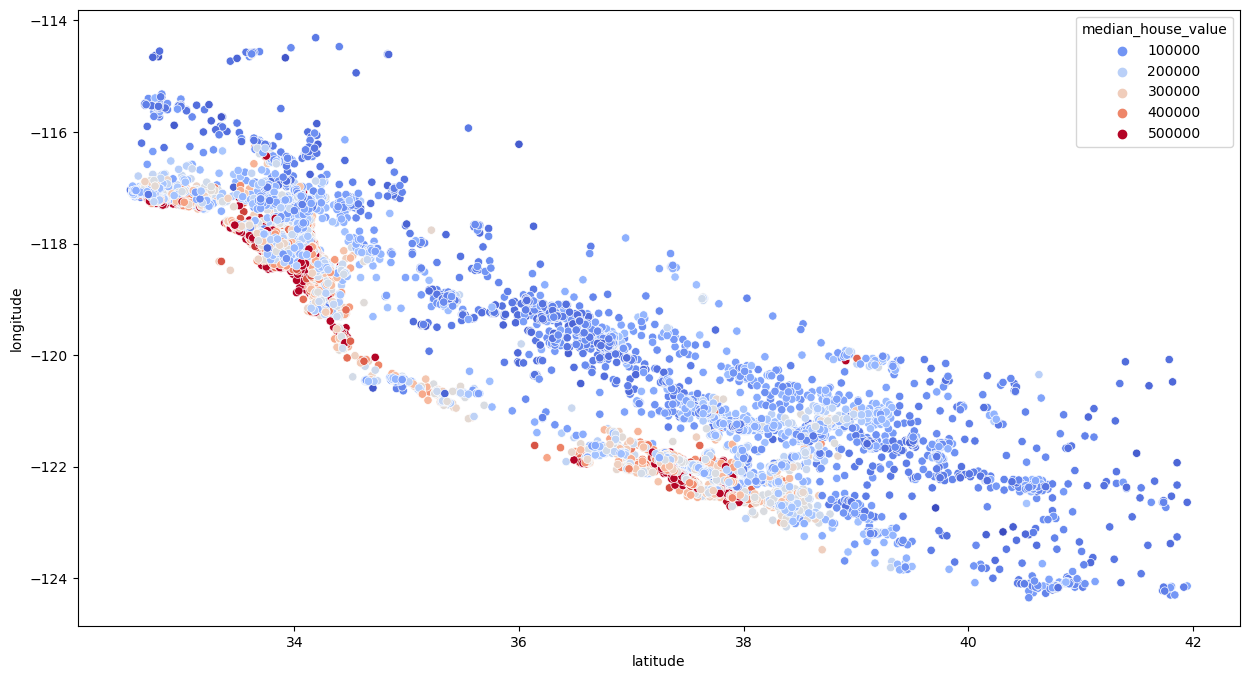

In [10]:
# house price in relation with lattitude & longitude (prices are higher when are close to ocean)
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude', y='longitude', data=t_data, hue = 'median_house_value', palette='coolwarm')

<AxesSubplot:>

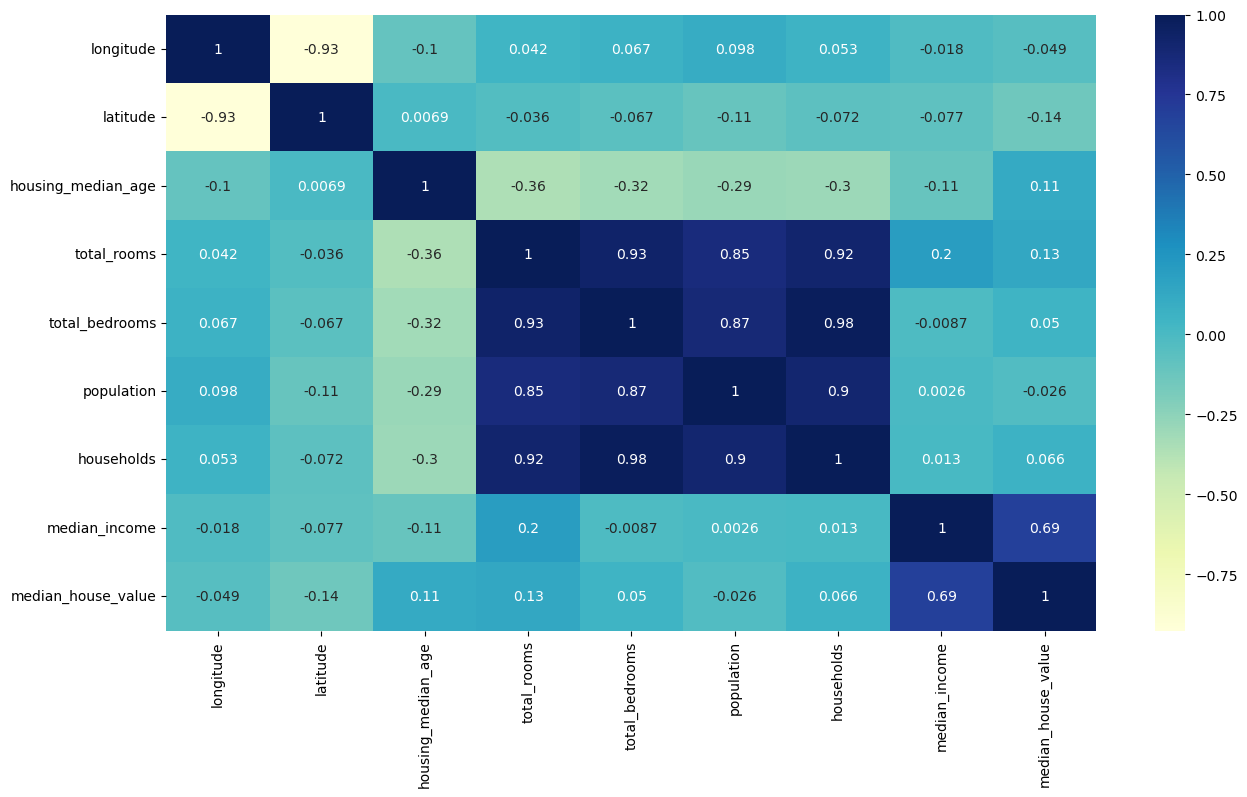

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(t_data.corr(), annot=True, cmap='YlGnBu')

##### Median income block correlates quite highly with median house value

#### Data Preprocessing

#### converting categorical variables into dummy or indicator variables for 'ocean_proximity'

In [15]:
t_data['ocean_proximity'].value_counts()

<1H OCEAN     7192
INLAND        5204
NEAR OCEAN    2132
NEAR BAY      1813
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
t_data = t_data.join(pd.get_dummies(t_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [17]:
t_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2816,-119.02,35.41,21.0,7.837949,6.318968,7.168580,6.249975,2.0575,67000.0,0,1,0,0,0
10848,-117.91,33.66,26.0,8.659040,7.190676,7.894318,7.018402,4.0341,243300.0,1,0,0,0,0
13403,-117.47,34.12,6.0,9.265397,7.477604,8.646641,7.349874,4.1797,141000.0,0,1,0,0,0
15733,-122.44,37.78,52.0,7.020191,5.634790,6.244167,5.652489,2.4196,346200.0,0,0,0,1,0
14408,-117.25,32.76,38.0,7.754482,6.202536,6.729824,6.073045,4.9125,452600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,-117.92,33.85,44.0,7.116394,5.556828,6.526495,5.501258,3.2344,170100.0,1,0,0,0,0
18436,-121.84,37.25,17.0,7.768110,6.161207,7.222566,6.093570,4.8355,141600.0,1,0,0,0,0
3248,-119.82,36.19,33.0,7.165493,5.609472,6.543912,5.438079,2.0221,52200.0,0,1,0,0,0
14953,-116.97,32.76,26.0,7.808323,5.749393,6.732211,5.703782,5.9878,270700.0,1,0,0,0,0


In [18]:
t_data['bedroom_ratio'] = t_data['total_bedrooms'] / t_data['total_rooms']
t_data['households_rooms'] = t_data['total_rooms'] / t_data['households']

#### Model building & training

#### Model 1 : LinearRegression

In [19]:
x_trains = t_data.drop(['median_house_value'], axis = 1)
y_trains = t_data['median_house_value']

reg = LinearRegression()

reg.fit(x_trains, y_trains)

LinearRegression()

In [21]:
test_data = x_train.join(y_train)


test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(test_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']



In [22]:
x_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']

In [23]:
reg.score(x_test, y_test)

0.6702890389898781

In [24]:
forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
forest.score(x_test, y_test)

0.9740208966578168